# PDIoT Data Cleaning

Hopefully by now you have collected some HAR data. We are asking you to collect data from two sensors - the Respeck (25Hz, accel and gyro) and the Thingy (25Hz, accel, gyro and magnetometer).

The Respeck is worn on the lower left ribcage, and the Thingy is worn in the front right pocket of the trousers.

We will explore some example data and how to can clean it in this notebook.

<br>

<hr>

<b><font color='#ff5271'> ‼️ Important: Any changes made to this notebook will not be saved. If you wish to run code from this notebook or make changes, please make a copy or download the .ipynb notebook file to your local computer.</font> </b>

<hr>

<br>

## <u> Accelerometer </u>
* Measures acceleration (including gravity)
* Observing the change in direction of gravity often more useful than linear acceleration due to movement
* Sensor values given in g along the axis of interest
* Placing our sensor flat on the table should give -1g on the Z axis and 0g on the other axes
* Cheap to buy and low power consumption

## <u> Gyroscope </u>
* Measures angular velocity
* Sensor values given in radians per second (deg/sec) along the axis of interest
* Placing our sensor flat on the table should give 0 values along all axes
* Higher power consumption

# Basic Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
import matplotlib.ticker as ticker
# %matplotlib notebook

# Reading the header

The files contain a header of size 5. This is where we specify the recording values:

* sensor type (Respeck or Thingy)
* activity type
* activity code (you can find the mapping between activities and their codes in the Constants file on the app)
* subject ID (always a student number)
* notes (can be empty)

In [8]:
# When modifying your own notebook, you can assign the filename_respeck variable to the filepath of
# your RESpeck data file
filename_respeck = "./Cleaned Data/Dan (s2061990)/Back/Respeck_s2061990_Lying_down_back_Laughing_unprocessed_28-09-2023_17-21-27.csv"
# size of the header
header_size = 0

# Open the RESpeck data file for reading using a context manager
with open(filename_respeck) as f:
  # Read and process the header lines
  head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
  # print each line in the header
  for line in head:
    print(line)

# Getting the recording metadata
It's useful to store the metadata about each recording, as you will need it for later.

In [9]:
sensor_type = ""
activity_type = ""
activity_code = -1
subject_id = ""
notes = ""

with open(filename_respeck) as f:
    head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
    for l in head:
        print(l)

        title, value = l.split(":")

        if title == "Sensor type":
            sensor_type = value.strip()
        elif title == "Activity type":
            activity_type = value.strip()
        elif title == "Activity code":
            activity_code = int(value.strip())
        elif title == "Subject id":
            subject_id = value.strip()
        elif title == "Notes":
            notes = value.strip()

You might use this later so you can pack it up into a function

In [10]:
def extract_header_info(filename: str, header_size: int = 5) -> Tuple[str, str, int, str, str]:
    """
    :param filename: Path to recording file.
    :param header_size: The size of the header, defaults to 5.
    :returns: A 5-tuple containing the sensor type, activity type, activity code, subject id and any notes.
    """
    sensor_type = ""
    activity_type = ""
    activity_code = -1
    subject_id = ""
    notes = ""

    with open(filename) as f:
        head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
        for l in head:
            print(l)

            title, value = l.split(":")

            if title == "Sensor type":
                sensor_type = value.strip()
            elif title == "Activity type":
                activity_type = value.strip()
            elif title == "Activity code":
                activity_code = int(value.strip())
            elif title == "Subject id":
                subject_id = value.strip()
            elif title == "Notes":
                notes = value.strip()

    return sensor_type, activity_type, activity_code, subject_id, notes

And now we can get the variables by applying the function

In [11]:
sensor_type, activity_type, activity_code, subject_id, notes = extract_header_info(filename=filename_respeck)

IndexError: list index out of range

# Reading the file
You can load the file itself using Pandas. You need to specify the amount of rows to be skipped in the beginning (the header size).

In [12]:
df_respeck = pd.read_csv(filename_respeck, header=header_size)
df_respeck

timestamp   accel_x   accel_y   accel_z     gyro_x     gyro_y  \
0    1695918044355 -0.486572 -0.136536  1.010925  -0.281250  11.875000   
1    1695918044395 -0.457520 -0.139954  1.034607  -5.406250  22.671875   
2    1695918044435 -0.351318 -0.063293  0.952820 -29.390625  39.921875   
3    1695918044475 -0.392090 -0.058655  0.964294 -10.828125   7.296875   
4    1695918044515 -0.365967  0.013367  0.987000  -5.593750   5.171875   
..             ...       ...       ...       ...        ...        ...   
755  1695918074555 -0.424561 -0.143372  0.950867  -2.265625   1.468750   
756  1695918074595 -0.363525 -0.046448  0.913513   2.734375  -4.031250   
757  1695918074635 -0.387451 -0.031311  0.896667   1.015625  -6.546875   
758  1695918074675 -0.457031 -0.072815  0.991394  -1.500000  -3.281250   
759  1695918074715 -0.452637 -0.104797  1.035583  -7.250000  -0.500000   

       gyro_z  
0    3.375000  
1    2.437500  
2   -7.750000  
3   -3.453125  
4   -1.390625  
..        ...  
755  0.625000  
756 -0.140625  
757  0.156250  
758  3.859375  
759  2.640625  

[760 rows x 7 columns]

To save the recording metadata for later we can append them as values in new columns

In [90]:
df_respeck['sensor_type'] = sensor_type
df_respeck['activity_type'] = activity_type
df_respeck['activity_code'] = activity_code
df_respeck['subject_id'] = subject_id
df_respeck['notes'] = notes

df_respeck

timestamp   accel_x   accel_y   accel_z    gyro_x    gyro_y  \
0    1695747419041 -0.108643 -0.988831  0.015808  0.406250  2.000000   
1    1695747419132 -0.119385 -0.987854  0.015076  0.312500  1.968750   
2    1695747419142 -0.110596 -0.986877  0.020447  0.093750  1.937500   
3    1695747419178 -0.114258 -0.985657  0.016296 -0.140625  2.093750   
4    1695747419223 -0.109131 -0.983948  0.017761  0.125000  1.906250   
..             ...       ...       ...       ...       ...       ...   
822  1695747451712 -0.114014 -0.993713  0.016541 -0.375000  1.421875   
823  1695747451742 -0.117188 -0.979553  0.017029 -0.140625  1.312500   
824  1695747451772 -0.106689 -0.988831  0.019958 -0.046875  1.343750   
825  1695747451832 -0.104492 -0.987122  0.009705 -0.562500  1.328125   
826  1695747451862 -0.107178 -0.985413  0.026062 -0.046875  1.359375   

       gyro_z sensor_type activity_type  activity_code subject_id notes  
0   -0.218750     Respeck       Sitting             -1   s2063346   1.1  
1   -0.140625     Respeck       Sitting             -1   s2063346   1.1  
2   -0.187500     Respeck       Sitting             -1   s2063346   1.1  
3   -0.390625     Respeck       Sitting             -1   s2063346   1.1  
4   -0.312500     Respeck       Sitting             -1   s2063346   1.1  
..        ...         ...           ...            ...        ...   ...  
822 -0.765625     Respeck       Sitting             -1   s2063346   1.1  
823 -0.640625     Respeck       Sitting             -1   s2063346   1.1  
824 -0.328125     Respeck       Sitting             -1   s2063346   1.1  
825 -0.687500     Respeck       Sitting             -1   s2063346   1.1  
826 -0.703125     Respeck       Sitting             -1   s2063346   1.1  

[827 rows x 12 columns]

One more important value to save for later is a recording ID. This will be used to split the entire dataset into separate recordings before you start doing any further splitting into windows. The name of the file can act as the unique recording ID for each recording.

In [91]:
filename_respeck.split("/")[-1].split(".")[0]

'Respeck_s2063346_Sitting_Normal_26-09-2023_17-57-31'

In [92]:
df_respeck['recording_id'] = filename_respeck.split("/")[-1].split(".")[0]
df_respeck

timestamp   accel_x   accel_y   accel_z    gyro_x    gyro_y  \
0    1695747419041 -0.108643 -0.988831  0.015808  0.406250  2.000000   
1    1695747419132 -0.119385 -0.987854  0.015076  0.312500  1.968750   
2    1695747419142 -0.110596 -0.986877  0.020447  0.093750  1.937500   
3    1695747419178 -0.114258 -0.985657  0.016296 -0.140625  2.093750   
4    1695747419223 -0.109131 -0.983948  0.017761  0.125000  1.906250   
..             ...       ...       ...       ...       ...       ...   
822  1695747451712 -0.114014 -0.993713  0.016541 -0.375000  1.421875   
823  1695747451742 -0.117188 -0.979553  0.017029 -0.140625  1.312500   
824  1695747451772 -0.106689 -0.988831  0.019958 -0.046875  1.343750   
825  1695747451832 -0.104492 -0.987122  0.009705 -0.562500  1.328125   
826  1695747451862 -0.107178 -0.985413  0.026062 -0.046875  1.359375   

       gyro_z sensor_type activity_type  activity_code subject_id notes  \
0   -0.218750     Respeck       Sitting             -1   s2063346   1.1   
1   -0.140625     Respeck       Sitting             -1   s2063346   1.1   
2   -0.187500     Respeck       Sitting             -1   s2063346   1.1   
3   -0.390625     Respeck       Sitting             -1   s2063346   1.1   
4   -0.312500     Respeck       Sitting             -1   s2063346   1.1   
..        ...         ...           ...            ...        ...   ...   
822 -0.765625     Respeck       Sitting             -1   s2063346   1.1   
823 -0.640625     Respeck       Sitting             -1   s2063346   1.1   
824 -0.328125     Respeck       Sitting             -1   s2063346   1.1   
825 -0.687500     Respeck       Sitting             -1   s2063346   1.1   
826 -0.703125     Respeck       Sitting             -1   s2063346   1.1   

                                          recording_id  
0    Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
1    Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
2    Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
3    Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
4    Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
..                                                 ...  
822  Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
823  Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
824  Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
825  Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  
826  Respeck_s2063346_Sitting_Normal_26-09-2023_17-...  

[827 rows x 13 columns]

# Getting the frequency (sampling rate) of the data

One useful function is checking the frequency of your recordings. The sensors are both running at 25Hz but it is possible that some packets are dropped along the way. You can use the below function to quickly check the frequency of any of your recordings.

In [93]:
def get_frequency(dataframe: pd.DataFrame, ts_column: str = 'timestamp') -> float:
    """
    :param dataframe: Dataframe containing sensor data. It needs to have a 'timestamp' column.
    :param ts_column: The name of the column containing the timestamps. Default is 'timestamp'.
    :returns: Frequency in Hz (samples per second)
    """

    return len(dataframe) / ((dataframe[ts_column].iloc[-1] - dataframe[ts_column].iloc[0]) / 1000)

Here we can see that the frequency of this recording is a bit over 25Hz, which is considered normal. You should be worried if your recordings deviate with more than 2Hz from the 25Hz threshold.

You can load the thingy data in a similar way

In [94]:
get_frequency(df_respeck)

25.19728222784193

# Getting the length of your data

You can check how long your data recording is via:

In [95]:
len(df_respeck) / get_frequency(df_respeck)

32.821

Since that is something we will be using often, we can also turn it into a function.

In [96]:
def get_recording_length(dataframe: pd.DataFrame):
  """
  :param dataframe: Dataframe containing sensor data.
  """
  return len(dataframe) / get_frequency(dataframe)

# Visualizing the data

Next we will learn how to visualise the data from both sensors.

Be careful when plotting sensor data, if you are trying to compare activities you need to make sure that the axes match. Accelerometer and Gyroscope data are measured on very different scales - accelerometer data is usually in the range [-4, 4], while gyroscope data can get to the 10s and 100s. You should not plot them on the same plot.

The following is a visualization plotting the accelerometer and gyroscope values measured while the subject is sitting and hyperventilating.

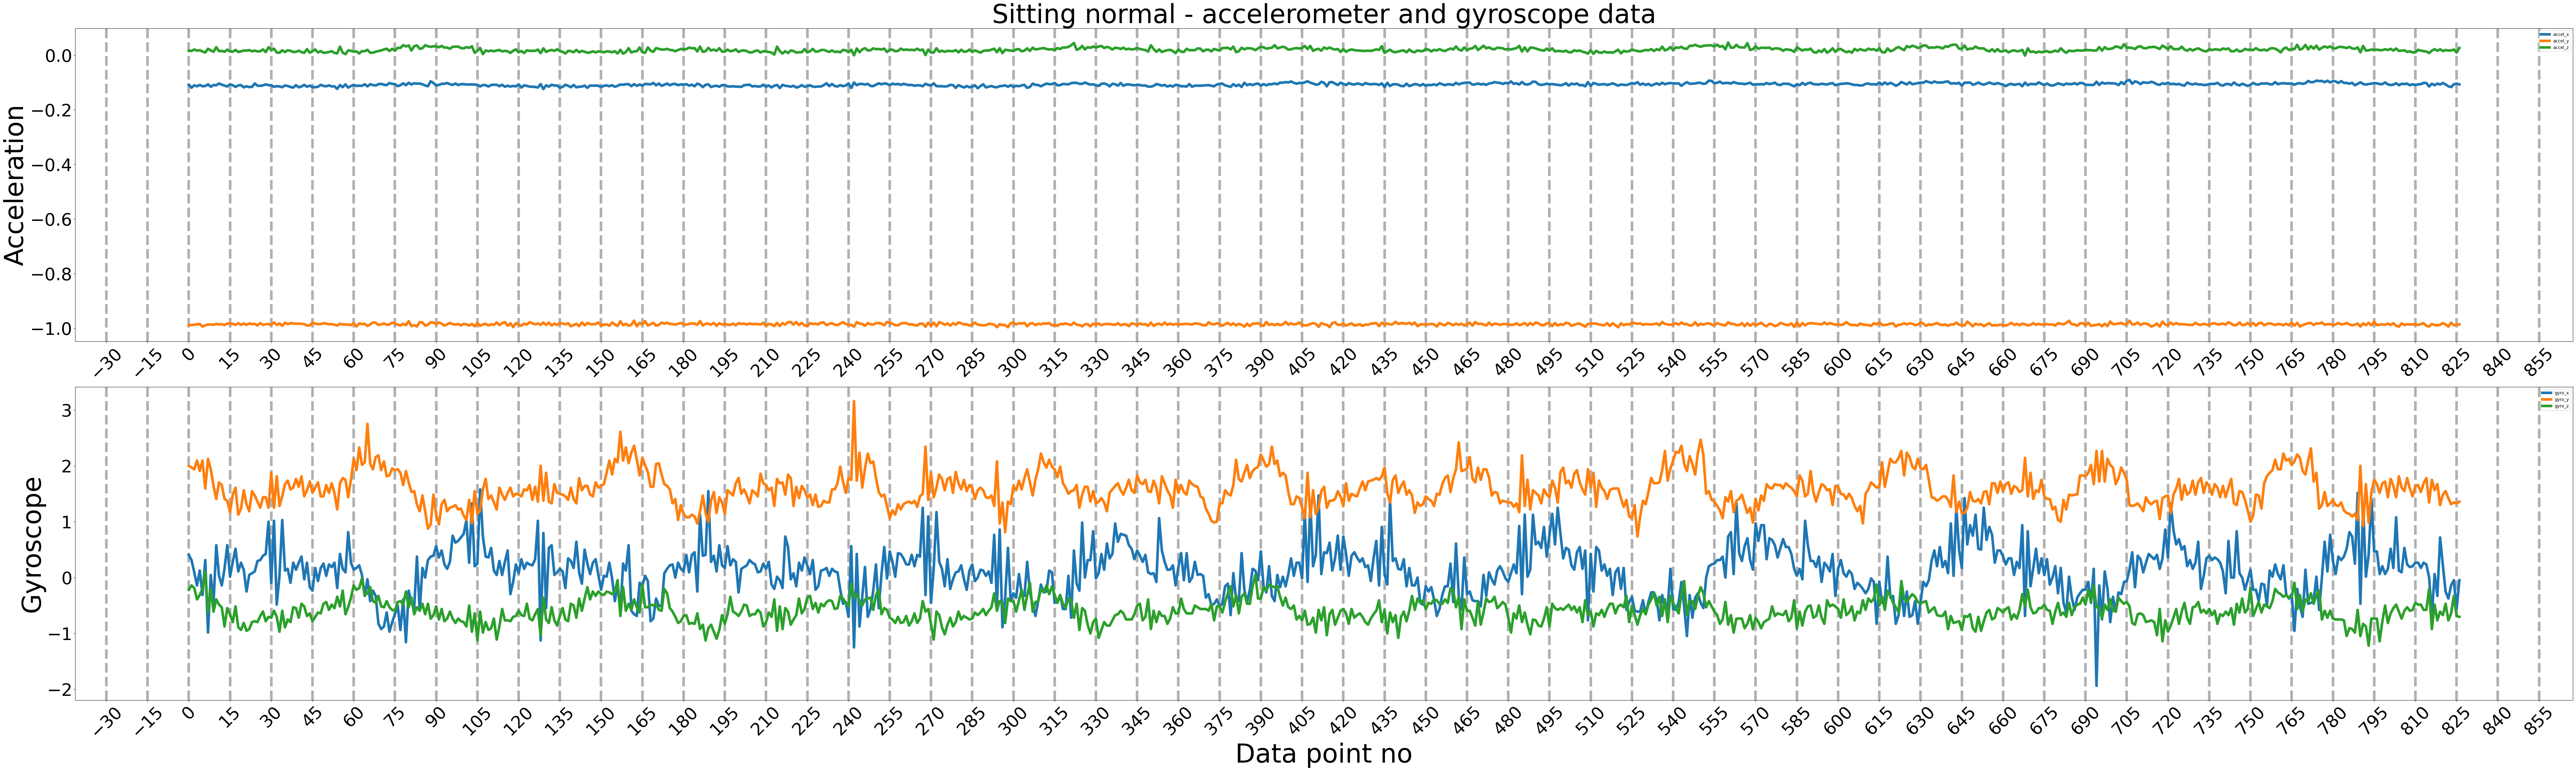

In [97]:
# Calculate the number of data points in your dataset
num_data_points = len(df_respeck)

# Calculate a suitable figure width based on the number of data points
# You can adjust the multiplier as needed to control the figure size
figure_width = num_data_points / 10  # Adjust the divisor to control the size


# Set a fixed aspect ratio for the figure (optional)
aspect_ratio = 0.3  # You can adjust this value as needed

# Calculate the figure height based on the aspect ratio and width
figure_height = figure_width * aspect_ratio

# Create the figure with the calculated size
fig, ax = plt.subplots(2, 1, figsize=(figure_width, figure_height))

plot_title = "Sitting normal - accelerometer and gyroscope data"

line_width = 6

# Plot respeck with custom line width
ax[0].plot(df_respeck['accel_x'], label="accel_x", linewidth=line_width)
ax[0].plot(df_respeck['accel_y'], label="accel_y", linewidth=line_width)
ax[0].plot(df_respeck['accel_z'], label="accel_z", linewidth=line_width)
ax[0].legend()

ax[0].set_title(f"{df_respeck['sensor_type'].values[0]} - {df_respeck['activity_type'].values[0]} \n Accelerometer data")

# Plot gyroscope data
ax[1].plot(df_respeck['gyro_x'], label="gyro_x", linewidth=line_width)
ax[1].plot(df_respeck['gyro_y'], label="gyro_y", linewidth=line_width)
ax[1].plot(df_respeck['gyro_z'], label="gyro_z", linewidth=line_width)
ax[1].legend()

num_xticks = len(df_respeck)//10
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(num_xticks))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(num_xticks))

fnt_size = 60
fnt_size2 = 40

ax[1].set_xlabel("Data point no", fontsize=fnt_size)  # Adjust fontsize for the x-axis label
ax[0].set_ylabel("Acceleration", fontsize=fnt_size)  # Adjust fontsize for the y-axis label
ax[1].set_ylabel("Gyroscope", fontsize=fnt_size)

# Adjust fontsize of individual ticks on the x-axis and y-axis for both subplots
ax[0].tick_params(axis='both', labelsize=fnt_size2)
ax[1].tick_params(axis='both', labelsize=fnt_size2)

# Rotate x-axis tick labels by 45 degrees for both subplots
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

ax[0].set_title(plot_title, size=fnt_size)

# Add vertical grid lines (gridlines along the x-axis)
ax[0].grid(axis='x', linestyle='--', linewidth=line_width)
ax[1].grid(axis='x', linestyle='--', linewidth=line_width)

plt.tight_layout()
plt.show()

### Since we will be visualizing sensor data often, we should make it into a function as well.

In [98]:
def plot_data(dataframe: pd.DataFrame, plot_title):
  # Calculate the number of data points in your dataset
  num_data_points = len(dataframe)

  # Calculate a suitable figure width based on the number of data points
  # You can adjust the multiplier as needed to control the figure size
  figure_width = num_data_points / 10  # Adjust the divisor to control the size


  # Set a fixed aspect ratio for the figure (optional)
  aspect_ratio = 0.3  # You can adjust this value as needed

  # Calculate the figure height based on the aspect ratio and width
  figure_height = figure_width * aspect_ratio

  # Create the figure with the calculated size
  fig, ax = plt.subplots(2, 1, figsize=(figure_width, figure_height))

  plot_title = plot_title

  line_width = 6

  # Plot respeck with custom line width
  ax[0].plot(dataframe['accel_x'], label="accel_x", linewidth=line_width)
  ax[0].plot(dataframe['accel_y'], label="accel_y", linewidth=line_width)
  ax[0].plot(dataframe['accel_z'], label="accel_z", linewidth=line_width)
  ax[0].legend()

  ax[0].set_title(f"{dataframe['sensor_type'].values[0]} - {dataframe['activity_type'].values[0]} \n Accelerometer data")

  # Plot gyroscope data
  ax[1].plot(dataframe['gyro_x'], label="gyro_x", linewidth=line_width)
  ax[1].plot(dataframe['gyro_y'], label="gyro_y", linewidth=line_width)
  ax[1].plot(dataframe['gyro_z'], label="gyro_z", linewidth=line_width)
  ax[1].legend()

  num_xticks = len(dataframe)//10
  ax[0].xaxis.set_major_locator(ticker.MaxNLocator(num_xticks))
  ax[1].xaxis.set_major_locator(ticker.MaxNLocator(num_xticks))

  fnt_size = 60
  fnt_size2 = 40

  ax[1].set_xlabel("Data point no", fontsize=fnt_size)  # Adjust fontsize for the x-axis label
  ax[0].set_ylabel("Acceleration", fontsize=fnt_size)  # Adjust fontsize for the y-axis label
  ax[1].set_ylabel("Gyroscope", fontsize=fnt_size)

  # Adjust fontsize of individual ticks on the x-axis and y-axis for both subplots
  ax[0].tick_params(axis='both', labelsize=fnt_size2)
  ax[1].tick_params(axis='both', labelsize=fnt_size2)

  # Rotate x-axis tick labels by 45 degrees for both subplots
  ax[0].tick_params(axis='x', labelrotation=45)
  ax[1].tick_params(axis='x', labelrotation=45)

  ax[0].set_title(plot_title, size=fnt_size)

  # Add vertical grid lines (gridlines along the x-axis)
  ax[0].grid(axis='x', linestyle='--', linewidth=line_width)
  ax[1].grid(axis='x', linestyle='--', linewidth=line_width)

  plt.tight_layout()
  plt.show()

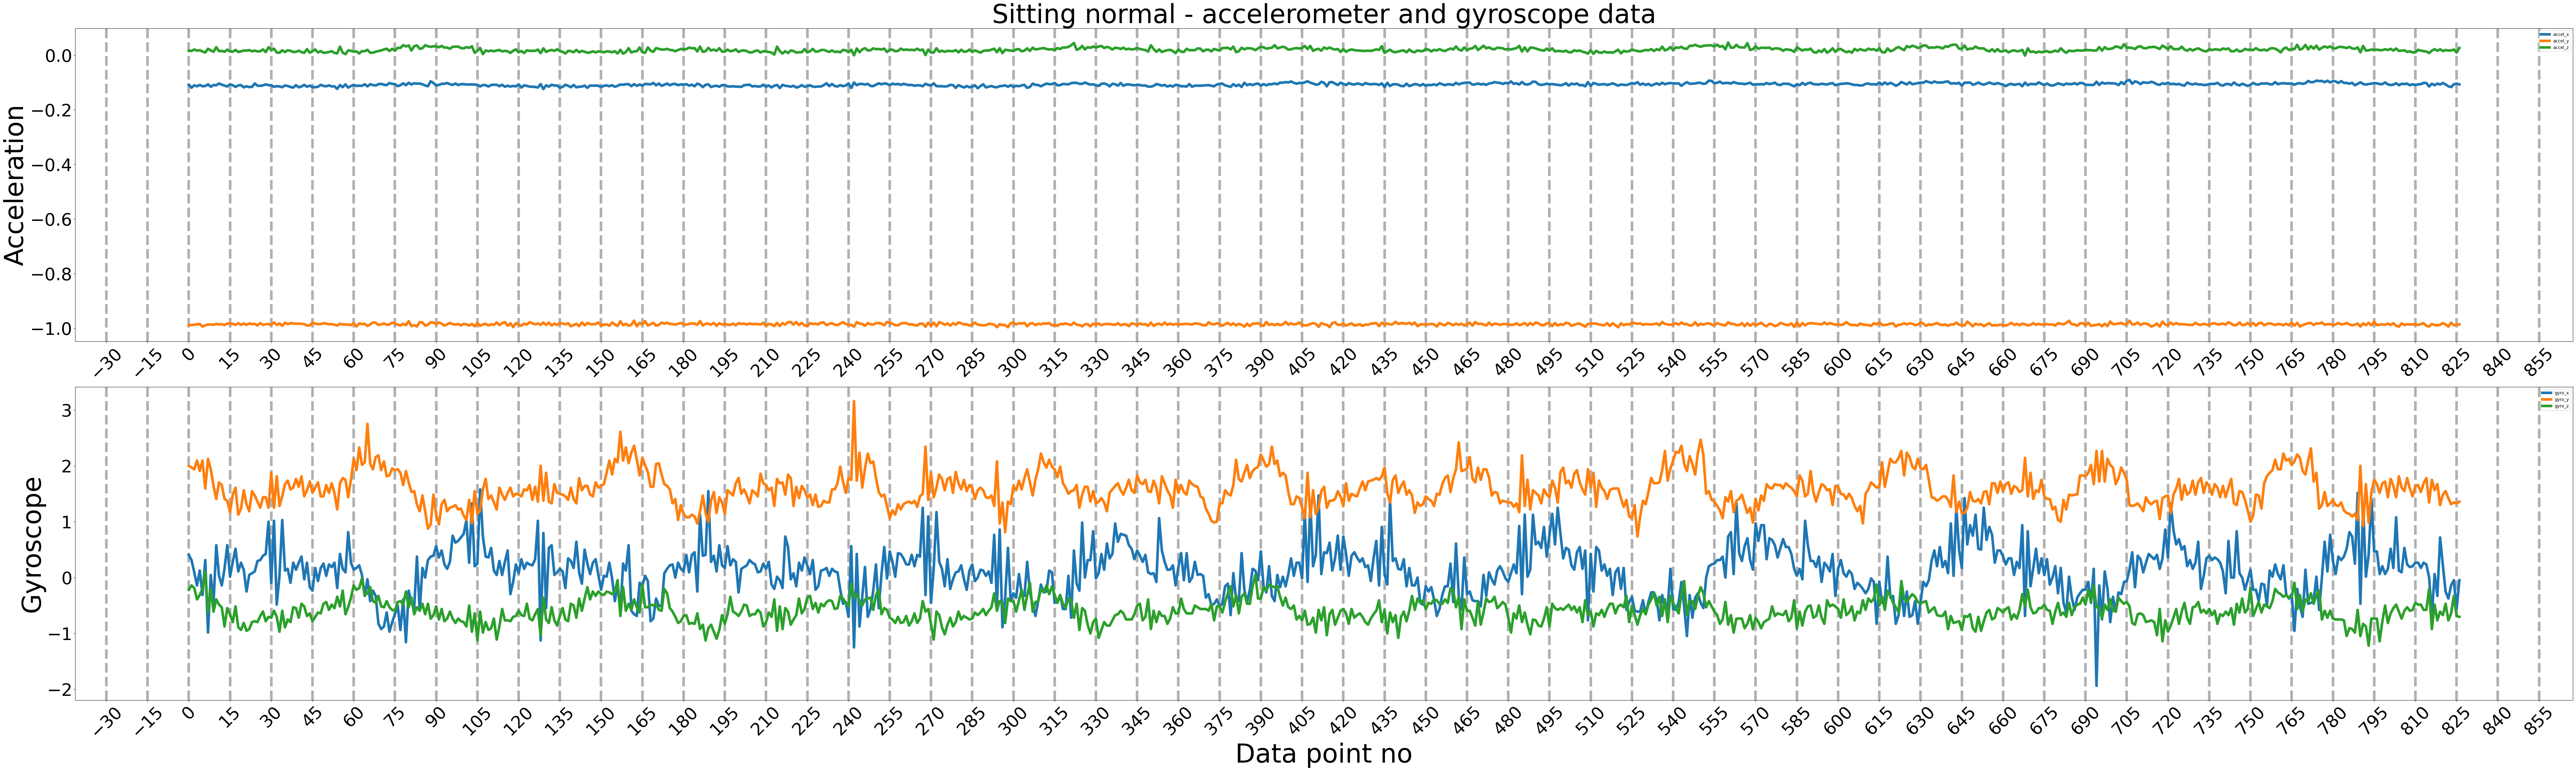

In [99]:
plot_data(df_respeck, "Sitting normal - accelerometer and gyroscope data")